### Data input

In [82]:
from nbtschematic import SchematicFile
import os
import pandas as pd
import numpy as np

# create python dataframe
df = pd.DataFrame(0, index=np.arange(400), columns=["label"])

# read all the file
ancient_path = '../data/ancient/'
modern_path = '../data/modern/'
row_index = 0

# for ancient building
for filename in os.listdir(ancient_path):
    if ".schematic" not in filename:
        continue
    
    sf = SchematicFile.load(ancient_path + filename)
    
    X = sf.blocks.shape[0]
    Y = sf.blocks.shape[1]
    Z = sf.blocks.shape[2]
    
    # counting block
    block_record = {}

    for i in range(X):
        for j in range(Y):
            for k in range(Z):
                block_id = sf.blocks[i, j, k]
                if block_id in block_record.keys():
                    block_record[block_id] += 1
                else:
                    block_record[block_id] = 1
    
    # insert to dataframe
    col_num = len(df.columns)
    row_num = 400
    
    # check whether we need new column
    for block_id in block_record:
        df.loc[row_index, "label"] = 0 #0 represent ancient, 1 represent modern
        
        block_id = int(block_id)
        
        if block_id in df.columns:
            df.loc[row_index, block_id] = int(block_record[block_id])
        else:
            df.insert(col_num, block_id, [0 for i in range(row_num)])
            col_num += 1
            df.loc[row_index, block_id] = int(block_record[block_id])
    
    row_index += 1
    
df

,label,7,1,4,98,0,3,-48,5,44,...,-22,-78,8,-3,-13,-53,-51,-99,-44,19
0,0,17667,66956,19754,59458,330777,23900,1246,3360,589,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,11238,0,0,257,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,728,50593,26487,0,0,117,...,0,0,0,0,0,0,0,0,0,0
3,0,0,6,0,0,10607,0,0,0,21,...,0,0,0,0,0,0,0,0,0,0
4,0,0,180,0,0,5586,0,0,544,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# for modern building
for filename in os.listdir(modern_path):
    if ".schematic" not in filename:
        continue
    
    sf = SchematicFile.load(modern_path + filename)
    
    X = sf.blocks.shape[0]
    Y = sf.blocks.shape[1]
    Z = sf.blocks.shape[2]
    
    # counting block
    block_record = {}

    for i in range(X):
        for j in range(Y):
            for k in range(Z):
                block_id = sf.blocks[i, j, k]
                if block_id in block_record.keys():
                    block_record[block_id] += 1
                else:
                    block_record[block_id] = 1
    
    # insert to dataframe
    col_num = len(df.columns)
    row_num = 400
    
    # check whether we need new column
    for block_id in block_record:
        df.loc[row_index, "label"] = 1 #0 represent ancient, 1 represent modern
        
        block_id = int(block_id)
        
        if block_id in df.columns:
            df.loc[row_index, block_id] = int(block_record[block_id])
        else:
            df.insert(col_num, block_id, [0 for i in range(row_num)])
            col_num += 1
            df.loc[row_index, block_id] = int(block_record[block_id])
    
    row_index += 1

In [84]:
df

,label,7,1,4,98,0,3,-48,5,44,...,-31,-15,-35,-11,-7,-8,-19,-16,-1,-14
0,0,17667,66956,19754,59458,330777,23900,1246,3360,589,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,11238,0,0,257,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,728,50593,26487,0,0,117,...,0,0,0,0,0,0,0,0,0,0
3,0,0,6,0,0,10607,0,0,0,21,...,0,0,0,0,0,0,0,0,0,0
4,0,0,180,0,0,5586,0,0,544,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,12,762,0,0,50346,14103,0,684,196,...,0,0,0,0,0,0,0,0,0,0
396,1,0,0,0,0,11153,0,0,0,1311,...,0,0,0,0,0,0,0,0,0,0
397,1,0,37,144,83,32485,16641,0,967,381,...,0,0,0,0,0,0,0,0,0,0
398,1,0,4804,0,197,119982,6201,0,678,23,...,0,0,0,0,0,0,0,0,0,0


### Data Visualization

In [106]:
# 計算哪一種建材對於兩個 label 的差值最大，造成最大的影響
D = {}

for col in df.columns:
    label0_mean = 0
    for index_of_label0 in range(200):
        label0_mean += df.loc[index_of_label0, col]
    label0_mean = label0_mean / 200
    
    label1_mean = 0
    for index_of_label1 in range(200, 400):
        label1_mean += df.loc[index_of_label1, col]
    label1_mean = label1_mean / 200
    
    D[col] = abs(label0_mean - label1_mean)

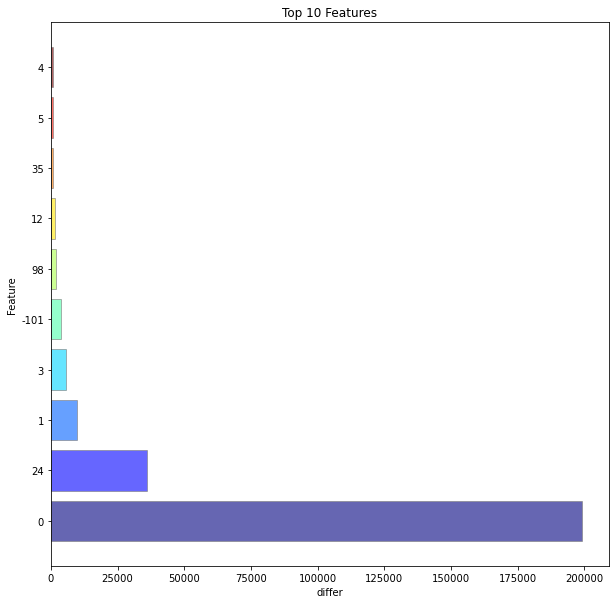

In [112]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Plot the data distribution by value count of their labels (targets)
def beautiful_plot(X, Y, x_label, y_label, title):
    x = np.arange(len(X))
    y = Y
    
    plt.figure(figsize=(10,10))
    cmap = cm.jet(np.linspace(0, 1, len(X)))
    plt.barh(x, y, edgecolor = 'gray', alpha=0.6, color=cmap)
    plt.yticks(x, X)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

s = sorted(D.items(), key=lambda item: item[1], reverse=True)[:10]
x_list = [k for k, _ in s]
y_list = [v for _, v in s]
beautiful_plot(x_list, y_list, 'differ', 'Feature', 'Top 10 Features')

### Data Preprocessing

In [85]:
from sklearn.utils import shuffle

# shuffle the data
sample_df = df.copy()
sample_df = shuffle(sample_df)
target = np.array(sample_df["label"])
sample_df = sample_df.drop("label", 1)

# block id 0 represent air block, we are not going to consider about it
sample_df = sample_df.drop(0, 1)

sample_df

,7,1,4,98,3,-48,5,44,-63,109,...,-31,-15,-35,-11,-7,-8,-19,-16,-1,-14
276,0,0,0,1287,56973,0,330,618,2,0,...,0,0,0,0,0,0,0,0,0,0
5,0,271,2548,4538,14092,0,3485,1597,0,0,...,0,0,0,0,0,0,0,0,0,0
309,0,0,0,0,0,0,979,256,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,27,649,0,0,0,12,0,77,...,0,0,0,0,0,0,0,0,0,0
52,0,0,0,70,149,0,1219,13,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0,0,0,0,0,0,0,86,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,468,0,884,0,0,220,87,0,126,...,0,0,0,0,0,0,0,0,0,0
47,0,0,11,19,101,0,197,476,4,119,...,0,0,0,0,0,0,0,0,0,0
155,2,8062,661,962,4697,0,336,768,0,16,...,0,0,0,0,0,0,0,0,0,0


In [86]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

# traing-test-split 7:3
training_sample, testing_sample, training_target, testing_target = train_test_split(sample_df, target, test_size = 0.3) 

# transfer to numpy array
x_training_sample = training_sample.to_numpy()
x_testing_sample = testing_sample.to_numpy()

# to pytorch numpy
T_training_sample = torch.FloatTensor(x_training_sample)
T_training_target = torch.LongTensor(training_target).type(torch.LongTensor)

T_testing_sample = torch.FloatTensor(x_testing_sample)
T_testing_target = torch.LongTensor(testing_target).type(torch.LongTensor)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(T_training_sample, T_training_target)
test = torch.utils.data.TensorDataset(T_testing_sample, T_testing_target)

### Model Construction 1 : ANN

In [87]:
class ANNModel(nn.Module):
    def __init__(self, input_features, hidden_layer1, output_features):
        super().__init__()
        self.fc1 = nn.Linear(input_features, hidden_layer1) 
        self.Sigmoid1 = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_layer1, output_features)


    def forward(self, x):
        out = self.fc1(x)
        out = self.Sigmoid1(out)
        out = self.fc2(out)

        return out
    

input_feature = len(sample_df.columns)
hidden_layer1 = 500
output_features = 2 # number of type of target

# Create ANN
model = ANNModel(input_feature, hidden_layer1, output_features)

# Cross Entropy Loss 
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

### Model Training 1 : ANN

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
epochs = 60

for i in range(epochs):
    pred = model.forward(T_training_sample)
    
    optimizer.zero_grad() # Clear gradients
    loss = criterion(pred, T_training_target)
    loss_list.append(loss)
    loss.backward() # Calculating gradients
    optimizer.step() # Update parameters
    

    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
    preds = []
    with torch.no_grad():
        for val in T_testing_sample:
            y_hat = model.forward(val)
            preds.append(y_hat.argmax().item())
    acc = accuracy_score(testing_target, preds)
    print("Accuracy: {}".format(acc))

epoch:  0  loss: 0.74800700
Accuracy: 0.6833333333333333
epoch:  1  loss: 0.46501836
Accuracy: 0.8166666666666667
epoch:  2  loss: 0.36506650
Accuracy: 0.825
epoch:  3  loss: 0.33324063
Accuracy: 0.8583333333333333
epoch:  4  loss: 0.22894675
Accuracy: 0.875
epoch:  5  loss: 0.21766052
Accuracy: 0.8333333333333334
epoch:  6  loss: 0.24255709
Accuracy: 0.8416666666666667
epoch:  7  loss: 0.21729237
Accuracy: 0.8833333333333333
epoch:  8  loss: 0.18342070
Accuracy: 0.9
epoch:  9  loss: 0.17190744
Accuracy: 0.8833333333333333
epoch: 10  loss: 0.17218280
Accuracy: 0.8833333333333333
epoch: 11  loss: 0.17542180
Accuracy: 0.875
epoch: 12  loss: 0.16869625
Accuracy: 0.8833333333333333
epoch: 13  loss: 0.15569204
Accuracy: 0.9
epoch: 14  loss: 0.14251393
Accuracy: 0.9
epoch: 15  loss: 0.13628830
Accuracy: 0.9083333333333333
epoch: 16  loss: 0.13809982
Accuracy: 0.9083333333333333
epoch: 17  loss: 0.13640667
Accuracy: 0.9083333333333333
epoch: 18  loss: 0.12949720
Accuracy: 0.9
epoch: 19  loss:

### Result Print : ANN

In [89]:
from prettytable import PrettyTable

# Predict the result with our model
preds = []
with torch.no_grad():
    for val in T_testing_sample:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())
        
acc = accuracy_score(testing_target, preds)
cm = confusion_matrix(testing_target, preds)
rc = recall_score(testing_target, preds, average='macro')
pcs = precision_score(testing_target, preds, average='macro')

# print confision matrix seperately because it is too big
print("Confusion Matrix: ")
print(cm)


# print table
x = PrettyTable()

x.field_names = ["Accuracy", "Recall", "Precision"]
x.add_row([acc, rc, pcs])
print(x)

Confusion Matrix: 
[[51  5]
 [ 5 59]]
+--------------------+--------------------+--------------------+
|      Accuracy      |       Recall       |     Precision      |
+--------------------+--------------------+--------------------+
| 0.9166666666666666 | 0.9162946428571428 | 0.9162946428571428 |
+--------------------+--------------------+--------------------+


### Model Construction : Decision tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree_clf(training_sample, training_target, testing_sample, testing_target):
    clf = DecisionTreeClassifier()
    
    predict_list = []
    
    clf.fit(training_sample, training_target)
    predict_list = clf.predict(testing_sample)
    
    result_list = []
    result_list.append(confusion_matrix(testing_target, predict_list))
    result_list.append(accuracy_score(testing_target, predict_list))
    result_list.append(recall_score(testing_target, predict_list, average='macro'))
    result_list.append(precision_score(testing_target, predict_list, average='macro'))
    return result_list

### Result Print : Decision tree

In [91]:
result = decision_tree_clf(training_sample, training_target, testing_sample, testing_target)

x = PrettyTable()

x.field_names = ["Confusion Matrix", "Accuracy", "Recall", "Precision"]
x.add_row([result[0], result[1], result[2], result[3]])
print(x)

+------------------+--------------------+--------------------+--------------------+
| Confusion Matrix |      Accuracy      |       Recall       |     Precision      |
+------------------+--------------------+--------------------+--------------------+
|     [[47  9]     | 0.8166666666666667 | 0.8180803571428572 | 0.8166666666666667 |
|     [13 51]]     |                    |                    |                    |
+------------------+--------------------+--------------------+--------------------+


### Model Construction 3 : Quantum ML model with Variational classifier

In [92]:
# relabeling data

quantum_df = df.copy()
quantum_df = shuffle(quantum_df)

for index, row in quantum_df.iterrows():
    if quantum_df.loc[index, 'label'] == 0:
        quantum_df.loc[index, 'label'] = -1
        
target = np.array(quantum_df["label"])
quantum_df = quantum_df.drop("label", 1)

# block id 0 represent air block, we are not going to consider about it
quantum_df = quantum_df.drop(0, 1)


In [93]:
import pennylane as qml
from pennylane import numpy as qnp
from pennylane.optimize import NesterovMomentumOptimizer

dev = qml.device("default.qubit", wires=4)

def get_angles(x):

    beta0 = 2 * qnp.arcsin(qnp.sqrt(x[1] ** 2) / qnp.sqrt(x[0] ** 2 + x[1] ** 2 + 1e-12))
    beta1 = 2 * qnp.arcsin(qnp.sqrt(x[3] ** 2) / qnp.sqrt(x[2] ** 2 + x[3] ** 2 + 1e-12))
    beta2 = 2 * qnp.arcsin(
        qnp.sqrt(x[2] ** 2 + x[3] ** 2)
        / qnp.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2 + x[3] ** 2)
    )

    return qnp.array([beta2, -beta1 / 2, beta1 / 2, -beta0 / 2, beta0 / 2])


def statepreparation(a):
    qml.RY(a[0], wires=0)

    qml.CNOT(wires=[0, 1])
    qml.RY(a[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[2], wires=1)

    qml.PauliX(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[3], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[4], wires=1)
    qml.PauliX(wires=0)

def layer(W):
    qml.Rot(W[0, 0], W[0, 1], W[0, 2], wires=0)
    qml.Rot(W[1, 0], W[1, 1], W[1, 2], wires=1)
    qml.CNOT(wires=[0, 1])

@qml.qnode(dev)
def circuit(weights, angles):
    statepreparation(angles)

    for W in weights:
        layer(W)

    return qml.expval(qml.PauliZ(0))


def variational_classifier(weights, bias, angles):
    return circuit(weights, angles) + bias

def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

def accuracy(labels, predictions):

    loss = 0
    for l, p in zip(labels, predictions):
        if abs(l - p) < 1e-5:
            loss = loss + 1
    loss = loss / len(labels)

    return loss

def cost(weights, bias, features, labels):
    predictions = [variational_classifier(weights, bias, f) for f in features]
    return square_loss(labels, predictions)

In [132]:
X = qnp.array(np.transpose(np.array([quantum_df[24].to_numpy(), quantum_df[1].to_numpy()])))
print(X.shape)
print("First X sample (original)  :", X[0])

# pad the vectors to size 2^2 with constant values
padding = 0.3 * qnp.ones((len(X), 1))
X_pad = qnp.c_[qnp.c_[X, padding], qnp.zeros((len(X), 1))]
print("First X sample (padded)    :", X_pad[0])

# normalize each input
normalization = qnp.sqrt(qnp.sum(X_pad ** 2, -1))
X_norm = (X_pad.T / normalization).T
print("First X sample (normalized):", X_norm[0])

# angles for state preparation are new features
features = qnp.array([get_angles(x) for x in X_norm], requires_grad=False)
print("First features sample      :", features[0])

Y = qnp.array(target)

qnp.random.seed(0)
num_data = len(Y)
num_train = int(0.75 * num_data)
index = qnp.random.permutation(range(num_data))
feats_train = features[index[:num_train]]
Y_train = Y[index[:num_train]]
feats_val = features[index[num_train:]]
Y_val = Y[index[num_train:]]

# We need these later for plotting
X_train = X[index[:num_train]]
X_val = X[index[num_train:]]

num_qubits = 2
num_layers = 6

weights_init = 0.01 * qnp.random.randn(num_layers, num_qubits, 3, requires_grad=True)
bias_init = qnp.array(0.0, requires_grad=True)

(400, 2)
First X sample (original)  : [0 0]
First X sample (padded)    : [0.  0.  0.3 0. ]
First X sample (normalized): [0. 0. 1. 0.]
First features sample      : [ 3.14159265 -0.          0.         -0.          0.        ]


In [133]:
opt = NesterovMomentumOptimizer(0.001)
batch_size = 5

# train the variational classifier
weights = weights_init
bias = bias_init

for it in range(60):
    # Update the weights by one optimizer step
    batch_index = qnp.random.randint(0, num_train, (batch_size,))
    feats_train_batch = feats_train[batch_index]
    Y_train_batch = Y_train[batch_index]
    weights, bias, _, _ = opt.step(cost, weights, bias, feats_train_batch, Y_train_batch)

    # Compute predictions on train and validation set
    predictions_train = [qnp.sign(variational_classifier(weights, bias, f)) for f in feats_train]
    predictions_val = [qnp.sign(variational_classifier(weights, bias, f)) for f in feats_val]

    # Compute accuracy on train and validation set
    acc_train = accuracy(Y_train, predictions_train)
    acc_val = accuracy(Y_val, predictions_val)

    print(
        "Iter: {:5d} | Cost: {:0.7f} | Acc validation: {:0.7f} "
        "".format(it + 1, cost(weights, bias, features, Y), acc_val)
    )

Iter:     1 | Cost: 1.9798902 | Acc validation: 0.3800000 
Iter:     2 | Cost: 1.9802027 | Acc validation: 0.3800000 
Iter:     3 | Cost: 1.9808419 | Acc validation: 0.3800000 
Iter:     4 | Cost: 1.9821547 | Acc validation: 0.3800000 
Iter:     5 | Cost: 1.9837573 | Acc validation: 0.3800000 
Iter:     6 | Cost: 1.9840513 | Acc validation: 0.3800000 
Iter:     7 | Cost: 1.9847077 | Acc validation: 0.3800000 
Iter:     8 | Cost: 1.9849009 | Acc validation: 0.3800000 
Iter:     9 | Cost: 1.9846667 | Acc validation: 0.3800000 
Iter:    10 | Cost: 1.9832899 | Acc validation: 0.3800000 
Iter:    11 | Cost: 1.9820562 | Acc validation: 0.3800000 
Iter:    12 | Cost: 1.9805666 | Acc validation: 0.3800000 
Iter:    13 | Cost: 1.9785107 | Acc validation: 0.3800000 
Iter:    14 | Cost: 1.9759750 | Acc validation: 0.3800000 
Iter:    15 | Cost: 1.9740930 | Acc validation: 0.3800000 
Iter:    16 | Cost: 1.9724391 | Acc validation: 0.3800000 
Iter:    17 | Cost: 1.9706454 | Acc validation: 0.380000